In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('/content/gdrive/My Drive/ProjectForPaper/Dataset/processed_data')

In [4]:
df.head()

,Unnamed: 0,CleanedText,Subjectivity,Polarity,Analysis
0,0,stayfrea alert corona virus spread money money...,0.0,0.0,Neutral
1,1,matrodamus corona virus temporari hous music f...,0.0,0.0,Neutral
2,2,gainbo whole entir world corona virus danger j...,0.4,0.2,Positive
3,3,ellanjeferguson krystallshere corona virus,0.0,0.0,Neutral
4,4,bradleoy corona virus said https wwfteavdch,0.0,0.0,Neutral


In [5]:
df.columns

Index(['Unnamed: 0', 'CleanedText', 'Subjectivity', 'Polarity', 'Analysis'], dtype='object')

In [6]:
data= df.drop(['Unnamed: 0'],axis = 1)

In [7]:
data.head()

,CleanedText,Subjectivity,Polarity,Analysis
0,stayfrea alert corona virus spread money money...,0.0,0.0,Neutral
1,matrodamus corona virus temporari hous music f...,0.0,0.0,Neutral
2,gainbo whole entir world corona virus danger j...,0.4,0.2,Positive
3,ellanjeferguson krystallshere corona virus,0.0,0.0,Neutral
4,bradleoy corona virus said https wwfteavdch,0.0,0.0,Neutral


In [8]:
clean_data=data.iloc[:10000,:]

In [15]:
clean_data.shape

(10000, 4)

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
#Data cleaning and preprocessing
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [16]:

messages=clean_data[['CleanedText','Analysis']]

In [17]:
messages.head()

,CleanedText,Analysis
0,stayfrea alert corona virus spread money money...,Neutral
1,matrodamus corona virus temporari hous music f...,Neutral
2,gainbo whole entir world corona virus danger j...,Positive
3,ellanjeferguson krystallshere corona virus,Neutral
4,bradleoy corona virus said https wwfteavdch,Neutral


In [18]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['CleanedText'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [19]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

#one-hot-encoding for Analysis column
y=pd.get_dummies(messages['Analysis'])
y=y.iloc[:,1].values

In [20]:

# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Training model using Naive bayes classifier

In [21]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
model_nb = MultinomialNB().fit(X_train, y_train)
y_pred_nb=model_nb.predict(X_test)
#Accuracy
print("Accuracy for Naive bayes classifier:",accuracy_score(y_test, y_pred_nb))

Accuracy for Naive bayes classifier: 0.842


# Training model using SVM classifier

In [22]:
#Import svm model
from sklearn import svm
from sklearn.metrics import accuracy_score
#Create a svm Classifier
model_svm = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
model_svm.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm = model_svm.predict(X_test)
# print Accuracy
print("Accuracy for SVM classifier:",accuracy_score(y_test, y_pred_svm))

Accuracy for SVM classifier: 0.9815


# Model Building with Decision Tree Classification

In [23]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics 
# Create Decision Tree classifer object
model_dt= DecisionTreeClassifier()

# Train Decision Tree Classifer
model_dt = model_dt.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dt= model_dt.predict(X_test)
print("Accuracy for Decesion Tree :",metrics.accuracy_score(y_test, y_pred_dt))

Accuracy for Decesion Tree : 0.989


# Model Building using Random Forests Classifiers

In [24]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

#Create a Gaussian Classifier
model_rf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
model_rf.fit(X_train,y_train)

y_pred_rf=model_rf.predict(X_test)
print("Accuracy for Random Forest:",metrics.accuracy_score(y_test, y_pred_rf))

Accuracy for Random Forest: 0.9715


# Model Building using Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
model_lr = LogisticRegression()
model_lr = model_lr.fit (X_train,y_train)
y_pred_lr=model_lr.predict(X_test)
print("Accuracy for Logistic Regression :",metrics.accuracy_score(y_test, y_pred_lr))

Accuracy for Logistic Regression : 0.9605


# Plot ROC and compare AUC

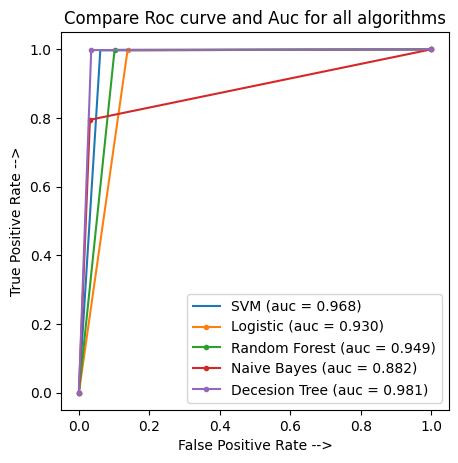

In [26]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_lr)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

rf_fpr,rf_tpr, threshold = roc_curve(y_test, y_pred_rf)
auc_rf= auc(rf_fpr, rf_tpr)

nb_fpr, nb_tpr, threshold = roc_curve(y_test, y_pred_nb)
auc_nb= auc(nb_fpr, nb_tpr)


decesiontree_fpr,decesiontree_tpr, threshold = roc_curve(y_test, y_pred_dt)
auc_decesiontree= auc(decesiontree_fpr, decesiontree_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (auc = %0.3f)' % auc_rf)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (auc = %0.3f)' % auc_nb)
plt.plot(decesiontree_fpr, decesiontree_tpr, marker='.', label='Decesion Tree (auc = %0.3f)' % auc_decesiontree)
plt.title('Compare Roc curve and Auc for all algorithms')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()